In [1]:
import pandas as pd
import os

folder = "house-prices-advanced-regression-techniques"
X = pd.read_csv(os.path.join(folder, "Xtrain.csv"))
X = X.drop('SalePrice', 1)
X.head()

y = pd.read_csv(os.path.join(folder, "ytrain.csv"))
y.head()
print(len(y),len(X))

1460 1460


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.2, random_state=42)

#normalize data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
y_train_log = np.log1p(y_train['SalePrice'])
y_test_log = np.log1p(y_test['SalePrice'])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_minmax)
X_test_pca = pca.transform(X_test_minmax)
print(pca.explained_variance_ratio_)

[0.13964642 0.07972173 0.05829733 0.04084765 0.03583725 0.03355175
 0.03046535 0.03002111 0.02739183 0.02503527 0.02349229 0.02097432
 0.01891521 0.01742057 0.01593482 0.01547524 0.0134434  0.01304206
 0.01223175 0.01136338 0.01108172 0.01049538 0.01010093 0.00984611
 0.00971902 0.00924291 0.00878911 0.00814468 0.00791741 0.00751771
 0.00718803 0.00681912 0.00662434 0.00632042 0.00620924 0.00604605
 0.00587446 0.00571341 0.00555824 0.00545721 0.00532843 0.00508776
 0.00494621 0.00486949 0.00469986 0.004382   0.00412615 0.00401244
 0.00382165 0.00376083]


In [22]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(X_train_pca, y_train_log)
print("train mean absolut error: ",mean_absolute_error(y_train_log, reg.predict(X_train_pca)))
print("test mean absolut error: ",mean_absolute_error(y_test_log, reg.predict(X_test_pca)))

train mean absolut error:  0.10639137137916722
test mean absolut error:  0.10923890236369961


<Figure size 1280x960 with 0 Axes>

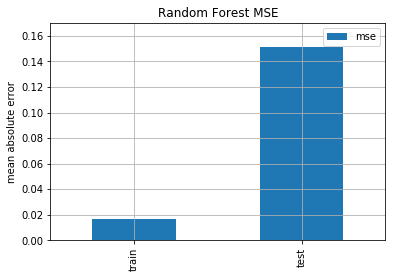

In [37]:
g1list = [0.017,0.151]
# g2list = [0.2854,0.2842,0.2856,0.2779,0.2716]
# g3list = [0.0685,0.0786,0.0827,0.139,0.1425]
n2list = ['train','test']

figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
df = pd.DataFrame(np.c_[g1list], index=n2list,columns=['mse'])
df.plot.bar()
# plt.xlabel("MSE of train and test")
plt.ylabel("mean absolute error")
#sns.barplot(x="time", hue="kind", y="data", data=df)
# plt.bar(n1list-0.2,g1list,label="4 output/thread bx8by2")
# plt.bar(n2list,g2list,label="4 output/thread bx16by4")
# plt.bar(n3list+0.2,g3list,label="4 output/thread bx32by8")
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylim([0,0.17])
plt.title("Random Forest MSE")
plt.grid()
plt.show()

In [23]:
# support vector regresion
from sklearn.svm import SVR
clf = SVR(C=1, epsilon=0.05)
clf.fit(X_train_pca, y_train_log)
print("train mean absolut error: ",mean_absolute_error(y_train_log, clf.predict(X_train_pca)))
print("test mean absolut error: ",mean_absolute_error(y_test_log, clf.predict(X_test_pca)))

train mean absolut error:  0.08721700731747045
test mean absolut error:  0.10850470058556248


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train_pca, y_train_log)
print(regr.feature_importances_)
print("train mean absolut error: ",mean_absolute_error(y_train_log, regr.predict(X_train_pca)))
print("test mean absolut error: ",mean_absolute_error(y_test_log, regr.predict(X_test_pca)))

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.5084802  0.00439388 0.07003538 0.03296029 0.06396382 0.00880549
 0.02110395 0.01255429 0.00265522 0.02322274 0.00469791 0.01598723
 0.00391249 0.00503472 0.00368213 0.00399399 0.01192687 0.0049791
 0.00247491 0.00362683 0.00737328 0.00493124 0.00534489 0.01872871
 0.00547374 0.00488386 0.00292081 0.00417811 0.01318367 0.00781805
 0.00420097 0.00371006 0.00445876 0.00388113 0.00718217 0.00458654
 0.01003682 0.00372516 0.00322175 0.00371939 0.00808511 0.00616915
 0.00674482 0.00897936 0.0053311  0.00357538 0.00977417 0.00511782
 0.00614074 0.00803179]
train mean absolut error:  0.06165699030191896
test mean absolut error:  0.15390873724511944


ValueError: Length of passed values is 50, index implies 214

In [36]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train_pca, y_train_log, early_stopping_rounds=5, eval_set=[(X_test_pca, y_test_log)])
print("train mean absolut error: ",mean_absolute_error(y_train_log, xgb_model.predict(X_train_pca)))
print("test mean absolut error: ",mean_absolute_error(y_test_log, xgb_model.predict(X_test_pca)))


[12:24:27] WARNING: /private/var/folders/sh/dv5hl32j4f3cyjln9hr4s_cc0000gn/T/pip-install-4sxifnjd/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.05301
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:5.63822
[2]	validation_0-rmse:3.94900
[3]	validation_0-rmse:2.76961
[4]	validation_0-rmse:1.94662
[5]	validation_0-rmse:1.38048
[6]	validation_0-rmse:0.98889
[7]	validation_0-rmse:0.72320
[8]	validation_0-rmse:0.54645
[9]	validation_0-rmse:0.42607
[10]	validation_0-rmse:0.34216
[11]	validation_0-rmse:0.29409
[12]	validation_0-rmse:0.26689
[13]	validation_0-rmse:0.25185
[14]	validation_0-rmse:0.24142
[15]	validation_0-rmse:0.23602
[16]	validation_0-rmse:0.23200
[17]	validation_0-rmse:0.22942
[18]	validation_0-rmse:0.22859
[19]	validation_0-rmse:0.22743
[20]	validation_0-rmse:0.22609
[21]	validation_0-rmse:0.22512
[22]	validation_0-rmse:0.22404
[23]	validation_0-rmse: